In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preprocessed_Data_Cryptos - 10 Percent of Actual Dataset.csv")
dataset.head()

,Crypto,Date,Time - 24 Hour Format,Time - 12 Hour Format,volume,open,Close Minus Open,Adj Close Minus Open,Close Minus Adj Close,High Minus Open,High Minus Close,High Minus Adj Close,High Minus Low,close,adj_close,high,low
0,TRAC-USD,03-11-2021,00:00:00,12:00 AM,260135378.0,2.680292,-0.311270,-0.311270,0.0,0.920654,1.231924,1.231924,1.520269,2.369022,2.369022,3.600946,2.080677
1,LOVELY32095-USD,12-12-2024,00:00:00,12:00 AM,483955.0,0.002148,-0.000008,-0.000008,0.0,0.000031,0.000039,0.000039,0.000101,0.002140,0.002140,0.002179,0.002078
2,BTS-USD,23-03-2022,00:00:00,12:00 AM,7568807.0,0.022858,0.001609,0.001609,0.0,0.001614,0.000005,0.000005,0.001713,0.024467,0.024467,0.024472,0.022759
3,AMP-USD,20-10-2023,00:00:00,12:00 AM,3191689.0,0.001428,0.000024,0.000024,0.0,0.000036,0.000012,0.000012,0.000045,0.001452,0.001452,0.001464,0.001419
4,WSTETH-USD,01-07-2024,00:00:00,12:00 AM,42079468.0,4018.009766,20.754639,20.754639,0.0,71.332275,50.577637,50.577637,71.629150,4038.764404,4038.764404,4089.342041,4017.712891


1.2 1) Replace the NaN values with correct value. And justify why you have chosen the same.

In [3]:
# To check the Presence of Null values in Entire Dataset in Count
dataset.isna().sum()

Crypto                   0
Date                     0
Time - 24 Hour Format    0
Time - 12 Hour Format    0
volume                   0
open                     0
Close Minus Open         0
Adj Close Minus Open     0
Close Minus Adj Close    0
High Minus Open          0
High Minus Close         0
High Minus Adj Close     0
High Minus Low           0
close                    0
adj_close                0
high                     0
low                      0
dtype: int64

1.3 2) How many of them are BLY_USD ?

In [4]:
BLY_USD = dataset[dataset["Crypto"]=='BLY-USD']
print("Total No. of BLY_USD are", len(BLY_USD))

Total No. of BLY_USD are 182


1.4 3) Find the Names of Highest and Lowest Volume Crypto from the dataset?

In [5]:
# Find the crypto with the highest volume
highest_volume_crypto = dataset.loc[dataset["volume"].idxmax(), "Crypto"]

# Find the crypto with the lowest volume
lowest_volume_crypto = dataset.loc[dataset["volume"].idxmin(), "Crypto"]

print(f"Crypto with Highest volume: {highest_volume_crypto}")
print(f"Crypto with Lowest volume: {lowest_volume_crypto}")

Crypto with Highest volume: USDT-USD
Crypto with Lowest volume: RBW-USD


<div class = "alert alert-block alert-danger"> 
    
NOTE : 
    
The Function - highlight_max_min(dataframe): is Not a Part of this Assignment but added For Highlighting the Few Requirements.
        
So You can Ignore this Function.
</div>

In [6]:
# Creating a Dynamic Function - highlight_max_min(with Parameter) to Highlight Maximum and Minimum Value of any Dataframe

def highlight_max_min(dataframe):
    """
    Highlights the maximum and minimum values in a DataFrame dynamically.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to be styled.

    Returns:
    pd.io.formats.style.Styler: Styled DataFrame with applied highlights.
    """
    styles = []  # Initialize a list to store styles for each cell

    # Iterate over the DataFrame rows and columns dynamically
    for row in dataframe.index:
        row_styles = []  # Temporary list to store styles for the current row
        for column in dataframe.columns:
            value = dataframe.loc[row, column]  # Retrieve the cell value dynamically

            # Check if the value is the maximum or minimum in the entire DataFrame
            if value == dataframe.max().max():  # Global maximum value
                row_styles.append('background-color: lightgreen')  # Highlight in green
            elif value == dataframe.min().min():  # Global minimum value
                row_styles.append('background-color: red')  # Highlight in red
            else:
                row_styles.append('background-color: white')  # Default background for other cells

        # Append the styles for the current row
        styles.append(row_styles)

    # Convert the styles into a DataFrame for styling compatibility
    def apply_styles_to_cells(df):
        return pd.DataFrame(styles, index=df.index, columns=df.columns)

    # Apply the styles dynamically to the given DataFrame
    return dataframe.style.apply(apply_styles_to_cells, axis=None)

1.5 4) What kind of relation between Column(s) open and close

In [7]:
# Actual Standard Values Given :
# 1.Perfect Positive Correlation (r = 1)
# 2.High Degree of Positive Correlation (r = 0.95 Or Higher)
# 3.Low Degree of Positive Correlation (r = 0.54 Or Lower)

# Calculate correlation
correlation = dataset['open'].corr(dataset['close'])

# Define correlation categories
correlation_categories = [("Perfect Positive Correlation", 1),("High Degree of Positive Correlation", 0.95),
    ("Low Degree of Positive Correlation", 0.54) ]

# Determine the correlation range
for category, threshold in correlation_categories:
    if correlation >= threshold:
        print(f"Correlation between open and close: {correlation} & (Rounded-Off : {correlation:.2f}) ")
        print(f"Column - open with Column - close is in {category} (which Ranges From r = {threshold} Or Higher)")
        break  # Stop after finding the correct category
    elif correlation <= 0.54:
        print(f"Correlation between open and close: {correlation} & (Rounded-Off : {correlation:.2f}) ")
        print("Column - open with Column - close is in Low Degree of Positive Correlation (which Ranges From r = 0.54 Or Lesser)")
        break

Correlation between open and close: 0.9995235213761077 & (Rounded-Off : 1.00) 
Column - open with Column - close is in High Degree of Positive Correlation (which Ranges From r = 0.95 Or Higher)


1.6 5) Which Crypto having Minimum Open ?

In [8]:
min_opening_by_crypto = dataset.groupby("Crypto")["open"].mean().idxmin()

# Actual minimum Opening value as well
min_opening = dataset.groupby("Crypto")["open"].mean().min()

print(f"The Crypto with the Minimum Average Opening is '{min_opening_by_crypto}' with Opening {min_opening:.2f}")

The Crypto with the Minimum Average Opening is 'ANDY35085-USD' with Opening 0.00


1.7 6) How many of Cryptos are above 500000 Volume ?

In [9]:
# Filtering out whole dataset according to their Status (salary>500000) and assigning into New Variable - SalaryAbove500000
CryptosAbove500000 = dataset[dataset["volume"]>500000]
countOfCryptosAbove500000 = len(CryptosAbove500000)
print("Total No. of Cryptos More than 500,000 :", countOfCryptosAbove500000)

Total No. of Cryptos More than 500,000 : 62671


1.8 7) Test the Analysis of Variance between open and close at signifance level 5% (Make decision using Hypothesis Testing) 

In [10]:
"""
Creating a Function - ANOVA_Paired_TTest_Dependent_Sample (With 4 Parameters as Input) 
to Automate the ANAVO Analysis for Paired T-Test (Dependent Sample)
"""

def ANOVA_Paired_TTest_Dependent_Sample(Categorical_Column_Name, Selection_In_Categorical_Column, Numerical_Group_01, Numerical_Group_02):
    """
    Performs a Paired T-Test (Dependent Sample) to check for significant differences
    between two conditions for the same Numerical_Group.
    
    Parameters:
        Categorical_Column_Name (str): Column name for the Numerical_Group (categorical).
        Selection_In_Categorical_Column (str): Specific Numerical_Group selection ("M" Or "F").
        Numerical_Group_01 (str): First numerical column to compare.
        Numerical_Group_02 (str): Second numerical column to compare.

    Returns:
        None: Prints the result of the hypothesis test.
    """
    
    # Importing the required function from the scipy library
    from scipy.stats import ttest_rel
    
    # Querying the dataset for the specified Numerical_Group and conditions
    Numerical_Group_01_Input = dataset[dataset[Categorical_Column_Name] == Selection_In_Categorical_Column][Numerical_Group_01]
    Numerical_Group_02_Input = dataset[dataset[Categorical_Column_Name] == Selection_In_Categorical_Column][Numerical_Group_02]

    # Calculating the Paired T-Test
    statistic, pvalue = ttest_rel(Numerical_Group_01_Input, Numerical_Group_02_Input)

    # Converting p-value to percentage
    pvalue_percentage = pvalue * 100

    # Displaying the results
    print(f"Statistic: {statistic}")
    print(f"p-value: {pvalue}")
    
    standard_pValue = 0.05
    
    # Hypothesis Testing
    if pvalue < standard_pValue :  # Compare the raw p-value (not percentage)
        print("\nResult:")
        print(f"p-value as a percentage: {pvalue_percentage:.2f}%")
        print("H0 / Null Hypothesis: There is no significant difference.")
        print("H1 / Alternate Hypothesis: There is a significant difference.")
        print("\nConclusion:", "\nRejected - H0 / Null Hypothesis since p-value < 0.05%.")
        print("Accepted - H1 / Alternate Hypothesis.")
    else:
        print("\nResult:")
        print(f"p-value as a percentage: {pvalue_percentage:.2f}%")
        print("H1 / Alternate Hypothesis: There is a significant difference.")
        print("H0 / Null Hypothesis: There is no significant difference.")
        print("\nConclusion:", "\nAccepted - H0 / Null Hypothesis since p-value >= 0.05%.")
        print("Rejected - H1 / Alternate Hypothesis.")

In [11]:
# Calling the Existing Function
ANOVA_Paired_TTest_Dependent_Sample("Crypto","WWDOGE-USD","open","close")

Statistic: -0.4191123405954415
p-value: 0.6759901915620887

Result:
p-value as a percentage: 67.60%
H1 / Alternate Hypothesis: There is a significant difference.
H0 / Null Hypothesis: There is no significant difference.

Conclusion: 
Accepted - H0 / Null Hypothesis since p-value >= 0.05%.
Rejected - H1 / Alternate Hypothesis.


1.9 8) Test the similarity between the Column - Crypto and Column - Date with respect to Column - close at significance level of 5%.(Make decision using Hypothesis Testing)

In [12]:
"""
Creating a Function - ANOVA_Unpaired_TTest_Two_Independent_Sample (With 5 Parameters as Input) 
to Automate the ANAVO Analysis for Paired T-Test (Dependent Sample)
"""

def ANOVA_Unpaired_TTest_Two_Independent_Sample(Categorical_Column_01, Selection_In_Categorical_Column_01, 
    Categorical_Column_02, Selection_In_Categorical_Column_02,Numerical_Condition_01):
    
    """
    Performs a Unpaired T-Test (Two_Independent Sample) to check for significant differences
    between two conditions for the same Numerical_Group.
    
    Parameters:
        Categorical_Column_01 (str): First categorical column to filter (e.g., 'degree_t').
        Selection_In_Categorical_Column_01 (str): Value to match in the first categorical column (e.g., 'Sci&Tech').
        Categorical_Column_02 (str): Second categorical column to filter (e.g., 'specialisation').
        Selection_In_Categorical_Column_02 (str): Value to match in the second categorical column (e.g., 'Mkt&HR').
        Numerical_Column (str): The numerical column to test (e.g., 'salary').

    Returns:
        None: Prints the result of the hypothesis test.
    """
    
    # importing a Function - ttest_ind from Module - stats of Library - scipy 
    from scipy.stats import ttest_ind
    
    # Querying the dataset for Two Different Groups and One Numerical condition
    Categorical_Group_01_Input = dataset[(dataset[Categorical_Column_01] == Selection_In_Categorical_Column_01) &
    (dataset[Categorical_Column_02] == Selection_In_Categorical_Column_02)][Numerical_Condition_01]
    
    # Querying the dataset Other than Two Different Groups and One Numerical condition
    Categorical_Group_02_Input = dataset[~(dataset[Categorical_Column_01] == Selection_In_Categorical_Column_01) &
    (dataset[Categorical_Column_02] == Selection_In_Categorical_Column_02)] [Numerical_Condition_01]
    
    # Calculating the Paired T-Test
    statistic, pvalue = ttest_ind(Categorical_Group_01_Input, Categorical_Group_02_Input)

    # Converting p-value to percentage
    pvalue_percentage = pvalue * 100

    # Displaying the results
    print(f"Statistic: {statistic}")
    print(f"p-value: {pvalue}")
    
    standard_pValue = 0.05
    
    # Hypothesis Testing
    if pvalue < standard_pValue :  # Compare the raw p-value (not percentage)
        print("\nResult:")
        print(f"p-value as a percentage: {pvalue_percentage:.2f}%")
        print("H0 / Null Hypothesis: There is no significant difference.")
        print("H1 / Alternate Hypothesis: There is a significant difference.")
        print("\nConclusion:", "\nRejected - H0 / Null Hypothesis since p-value < 0.05%.")
        print("Accepted - H1 / Alternate Hypothesis.")
    else:
        print("\nResult:")
        print(f"p-value as a percentage: {pvalue_percentage:.2f}%")
        print("H0 / Null Hypothesis: There is no significant difference.")
        print("H1 / Alternate Hypothesis: There is a significant difference.")
        print("\nConclusion:", "\nAccepted - H0 / Null Hypothesis since p-value >= 0.05%.")
        print("Rejected - H1 / Alternate Hypothesis.")

In [13]:
# Calling the Existing Function
ANOVA_Unpaired_TTest_Two_Independent_Sample("Time - 24 Hour Format","13:30:00","Time - 12 Hour Format","1:30 PM","volume")

Statistic: nan
p-value: nan

Result:
p-value as a percentage: nan%
H0 / Null Hypothesis: There is no significant difference.
H1 / Alternate Hypothesis: There is a significant difference.

Conclusion: 
Accepted - H0 / Null Hypothesis since p-value >= 0.05%.
Rejected - H1 / Alternate Hypothesis.


1.10 9) Convert the Normal Distribution to Standard Normal Distribution for column -  adj_close

In [14]:
"""
※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
𝐂𝐫𝐞𝐚𝐭𝐢𝐧𝐠 𝐚 𝐅𝐮𝐧𝐜𝐭𝐢𝐨𝐧 ➖ stdNormalDistributionGraph ❪𝐃𝐚𝐭𝐚𝐬𝐞𝐭 Column Name 𝐚𝐬 𝐏𝐚𝐫𝐚𝐦𝐞𝐭𝐞𝐫❫
𝐏𝐮𝐫𝐩𝐨𝐬𝐞 : 𝐓𝐨 𝐀𝐮𝐭𝐨𝐦𝐚𝐭𝐞 𝐭𝐨 Convert Normal Distribution To Standard Normal Distribution 
※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
"""
def stdNormalDistributionGraph(columnNameOfDataset):
    
    """1. Importing Necessary Libraries"""

    #importing Library - seaborn and assigning into a New Variable - sb
    #seaborn is used for plotting the "Probability Distribution"
    import seaborn as sb
      
    """2. Calculating Mean and Standard Deviation for Sample (columnNameOfDataset)"""

    #Creating a New variable - Sample and assigning dataset into it
    sample = columnNameOfDataset
    sample_Mean = sample.mean()
    sample_StandardDeviation = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_Mean, sample_StandardDeviation))

    """3. Calculating Z-score for Sample (columnNameOfDataset)"""
    
    # A list of values for Sample (columnNameOfDataset) is created.
    values = [value for value in columnNameOfDataset]    
    
    # Here, Calculating Z-score for Sample (columnNameOfDataset)
    z_score = [((x-sample_Mean)/sample_StandardDeviation) for x in values]
    
    #Plotting Graph of Distance Plot Using Calculated Z-score
    sb.distplot(z_score,kde=True)

Mean=372.270, Standard Deviation=4487.951


C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



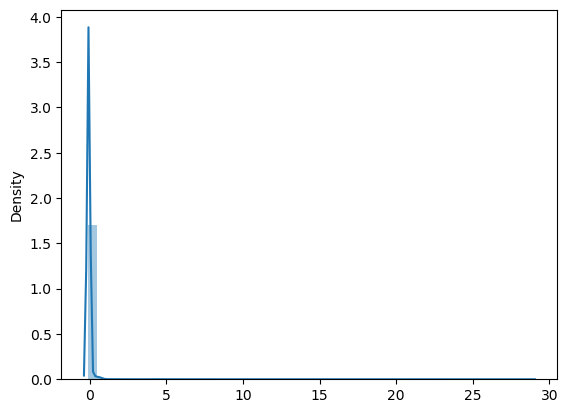

In [15]:
stdNormalDistributionGraph(dataset["adj_close"])

1.11 10) What is the probability Density Function of the Volume range from 7000000 to 9000000?

In [16]:
"""
※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
𝐂𝐫𝐞𝐚𝐭𝐢𝐧𝐠 𝐚 𝐅𝐮𝐧𝐜𝐭𝐢𝐨𝐧 ➖ 𝐠𝐞𝐭_𝐩𝐝𝐟_𝐩𝐫𝐨𝐛𝐚𝐛𝐢𝐥𝐢𝐭𝐲 ❪𝐃𝐚𝐭𝐚𝐬𝐞𝐭 Column Name 𝐚𝐬 𝐏𝐚𝐫𝐚𝐦𝐞𝐭𝐞𝐫❫
𝐏𝐮𝐫𝐩𝐨𝐬𝐞 : 𝐓𝐨 𝐀𝐮𝐭𝐨𝐦𝐚𝐭𝐞 𝐭𝐨 𝐤𝐧𝐨𝐰 𝐄𝐱𝐢𝐬𝐭𝐢𝐧𝐠 𝐏𝐞𝐫𝐜𝐞𝐧𝐭𝐚𝐠𝐞 𝐰𝐢𝐭𝐡𝐢𝐧 𝐭𝐡𝐞 𝐆𝐢𝐯𝐞𝐧 𝐒𝐭𝐚𝐫𝐭 𝐚𝐧𝐝 𝐄𝐧𝐝 𝐑𝐚𝐧𝐠𝐞
※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
"""

def get_pdf_probability (columnNameOfDataset,startRange,endRange):

    """1. Importing Necessary Libraries"""

    #importing a module - pyplot from Library - matplotlib
    #pyplot is used for plotting Graphs
    from matplotlib import pyplot
    
    #importing a Class - norm from module - stats of Library - scipy 
    #norm helps to define the "Normal Distribution"
    from scipy.stats import norm 
    
    #importing Library - seaborn and assigning into a New Variable - sb
    #seaborn is used for plotting the "Probability Distribution"
    import seaborn as sb
    
    """2. Plotting the Data Distribution"""  
    
    #It Plots a "Histogram" of the dataset with "Kernel Density Estimation (KDE)"
    #Color of "Kernel Density Estimation (KDE)" will be "Blue"
    #Color of "Histogram Bars" will be "Yellow"
    data_distrubion = sb.distplot(columnNameOfDataset, kde=True, kde_kws={'color':'Blue'}, color='gold')
    pyplot.axvline(startRange,color='Green')
    pyplot.axvline(endRange,color='Red')
    
    """3. Calculating Mean and Standard Deviation for Sample (Dataset)"""

    #Creating a New variable - Sample and assigning dataset into it
    sample = columnNameOfDataset
    sample_Mean = sample.mean()
    sample_StandardDeviation = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_Mean, sample_StandardDeviation))

    """4. Defining the Normal Distribution"""
    
    # Normal distribution (dist) is calculated using the pre-calculated mean and standard deviation
    norm_dist = norm(sample_Mean, sample_StandardDeviation)
    
    """5. Calculating Probability for the Given Range"""
    
    # A list of values between startrange and endrange is created.
    values = [value for value in range(startRange,endRange)]    
    
    # The Probability Density Function (PDF) is Calculated for each value.
    probabilities = [norm_dist.pdf(value) for value in values] 

    # Summing all the Calculated Probabilities
    summed_probabilities = sum(probabilities)
    
    #Converting into Percentage and printing the same
    probability_Percentage = (summed_probabilities * 100)
    print(f"Percentage of Area between the given Range ({startRange},{endRange}) : {probability_Percentage:.2f} %")
    
    # Finally, the function Ends by returning the summed probability.
    return probability_Percentage

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Mean=363.179, Standard Deviation=4385.051
Percentage of Area between the given Range (350,400) : 0.45 %


0.45488502253137264

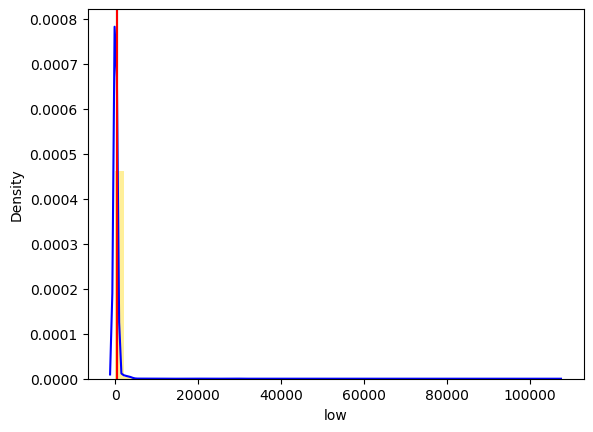

In [17]:
get_pdf_probability(dataset["low"],350,400)

1.12 11) Test the similarity between the Crypto (POLYX-USD) with respect to high and low at significance level of 5%. (Make decision using Hypothesis Testing)

In [18]:
# Calling the Existing Function
ANOVA_Paired_TTest_Dependent_Sample("Crypto","POLYX-USD","high","low")

Statistic: 8.982520454421435
p-value: 7.326400755065826e-15

Result:
p-value as a percentage: 0.00%
H0 / Null Hypothesis: There is no significant difference.
H1 / Alternate Hypothesis: There is a significant difference.

Conclusion: 
Rejected - H0 / Null Hypothesis since p-value < 0.05%.
Accepted - H1 / Alternate Hypothesis.


1.13 12) Which parameter is highly correlated with Column - close ?

In [19]:
#Purpose of function To know the Correlation between Quantitative Columns
correlation_dataframe = dataset.corr().iloc[1:, 1:]

#Calling Already Created Function - highlight_max_min(With Parameter)
highlight_max_min(correlation_dataframe)

,open,Close Minus Open,Adj Close Minus Open,Close Minus Adj Close,High Minus Open,High Minus Close,High Minus Adj Close,High Minus Low,close,adj_close,high,low
open,1,0.0233018,0.0233148,-0.00406326,0.571689,0.545607,0.545597,0.692022,0.999524,0.999524,0.999613,0.99929
Close Minus Open,0.0233018,1,0.999995,-0.000247957,0.435726,-0.453081,-0.453084,-0.158922,0.0541486,0.0541487,0.0376222,0.0491508
Adj Close Minus Open,0.0233148,0.999995,1,-0.00347011,0.435734,-0.453069,-0.453081,-0.158909,0.0541614,0.0541617,0.0376351,0.0491635
Close Minus Adj Close,-0.00406326,-0.000247957,-0.00347011,1,-0.00322678,-0.00297656,-0.000126103,-0.00369424,-0.00406612,-0.00416559,-0.00409659,-0.00403565
High Minus Open,0.571689,0.435726,0.435734,-0.00322678,1,0.604974,0.604968,0.724626,0.584458,0.584458,0.594301,0.574573
High Minus Close,0.545607,-0.453081,-0.453069,-0.00297656,0.604974,1,0.999996,0.858283,0.530965,0.530965,0.555334,0.525596
High Minus Adj Close,0.545597,-0.453084,-0.453081,-0.000126103,0.604968,0.999996,1,0.858276,0.530956,0.530956,0.555325,0.525587
High Minus Low,0.692022,-0.158922,-0.158909,-0.00369424,0.724626,0.858283,0.858276,1,0.686288,0.686288,0.702912,0.67066
close,0.999524,0.0541486,0.0541614,-0.00406612,0.584458,0.530965,0.530956,0.686288,1,1,0.999579,0.999613
adj_close,0.999524,0.0541487,0.0541617,-0.00416559,0.584458,0.530965,0.530956,0.686288,1,1,0.999579,0.999613


In [20]:
#Drop All Rows (Except-close) and Columns (sl_no and close)
correlation_dataframe = dataset.corr().iloc[1:, 0:16]

#Specifying row ('close') to be Highlighted
close_correlation_row = correlation_dataframe.loc[['close']] 

# Retrieving the cell value dynamically
for row in close_correlation_row.index:        
    
    for column in close_correlation_row.columns:
        value = close_correlation_row.loc[row, column]  
        
        if value == close_correlation_row.max().max(): 
            print("The Highly Correlated Parameter with close : ", column," - ", close_correlation_row.max().max())
        elif value == close_correlation_row.min().min(): 
            print("The Least Correlated Parameter with close : ", column," - ", close_correlation_row.min().min())
                
#Calling Already Created Function - highlight_max_min(With Parameter) to Highlight the Specified Row of Dataframe
highlight_max_min(close_correlation_row)

The Least Correlated Parameter with close :  Close Minus Adj Close  -  -0.004066116821315859
The Highly Correlated Parameter with close :  close  -  1.0


,volume,open,Close Minus Open,Adj Close Minus Open,Close Minus Adj Close,High Minus Open,High Minus Close,High Minus Adj Close,High Minus Low,close,adj_close,high,low
close,0.0016937,0.999524,0.0541486,0.0541614,-0.00406612,0.584458,0.530965,0.530956,0.686288,1,1,0.999579,0.999613
